# Day 2: Linear Regression Deep Dive (2.1)

## Table of Contents
1. [Simple & Multiple Linear Regression Recap (2.1.1)](#simple-multiple-recap)
   - Recap from Day 1
   - Simple Linear Regression (SLR)
   - Multiple Linear Regression (MLR)
   - Matrix Representation
   - Scikit-learn Implementation
2. [Assumptions of Linear Regression (2.1.2)](#assumptions)
   - Why Assumptions Matter
   - Linearity Assumption
   - Independence Assumption
   - Normality of Errors Assumption
   - Equal Variance (Homoscedasticity) Assumption
   - Multicollinearity Issue
   - Addressing Assumption Violations
3. [Interactive Exercises](#interactive-exercises)
4. [Practice Questions](#practice-questions)

<a id="simple-multiple-recap"></a>
## 2.1.1 Simple & Multiple Linear Regression Recap

### Recap from Day 1

Yesterday, we introduced Linear Regression as a method to model linear relationships between features (X) and a continuous target variable (y). We discussed the fundamental concept of fitting a line (or hyperplane) through data points to minimize the error between predictions and actual values.

Let's go deeper today and explore both forms of linear regression, their mathematical foundations, and practical implementation aspects.

### Simple Linear Regression (SLR)

Simple Linear Regression involves one independent variable (feature) to predict the dependent variable (target).

**The Model Equation:**
$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$

Where:
- $\hat{y}$ is the predicted value of the target
- $\hat{\beta}_0$ is the intercept (the value of $\hat{y}$ when $x = 0$)
- $\hat{\beta}_1$ is the slope (the change in $\hat{y}$ for a one-unit increase in $x$)
- $x$ is the independent variable (feature)

**Finding the Best Line:**
We find the best intercept ($\hat{\beta}_0$) and slope ($\hat{\beta}_1$) to minimize the Mean Squared Error (MSE) between predicted ($\hat{y}$) and actual (y) values:

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

**Closed-Form Solution:**
For simple linear regression, the analytical solution for the best-fitting line is:

$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$, respectively.

![Simple Linear Regression](https://i.imgur.com/4vYALM5.png)

**Interpretation of Coefficients:**
- $\hat{\beta}_0$ (Intercept): The predicted value when $x = 0$. This may not always be meaningful in the real-world context.
- $\hat{\beta}_1$ (Slope): The expected change in the target variable for a one-unit increase in the feature. This tells us both the direction (positive/negative) and magnitude of the relationship.

### Multiple Linear Regression (MLR)

Multiple Linear Regression extends SLR to include two or more independent variables (features).

**The Model Equation:**
$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \cdots + \hat{\beta}_p x_p$

Where:
- $p$ is the number of features
- Each feature ($x_j$) has its own coefficient ($\hat{\beta}_j$)
- $\hat{\beta}_j$ represents the expected change in $\hat{y}$ for a one-unit change in $x_j$, holding all other features constant

**Geometric Interpretation:**
Instead of fitting a line, MLR fits a plane (2 features) or a hyperplane (>2 features) to the data in higher-dimensional space.

![Multiple Linear Regression](https://i.imgur.com/w8tDRYO.png)

**Interpretation of MLR Coefficients:**
- Each coefficient ($\hat{\beta}_j$) represents the expected change in the target for a one-unit change in the corresponding feature, **assuming all other features remain constant**.
- This "all else held constant" interpretation is crucial and allows us to isolate the effect of each individual feature.

**Example Interpretation:**
If we're predicting house prices based on multiple features:
- $\hat{\beta}_{\text{size}} = 150$ means: "For each additional square foot, we expect the house price to increase by `$150`, assuming all other features remain constant."
- $\hat{\beta}_{\text{age}} = -2000$ means: "For each additional year of age, we expect the house price to decrease by `$2000`, assuming all other features remain constant."

### Matrix Representation

For those with a linear algebra background, multiple linear regression has an elegant representation in matrix form:

$\mathbf{y} = \mathbf{X\beta} + \mathbf{\epsilon}$

Where:
- $\mathbf{y}$ is the $n \times 1$ vector of target values
- $\mathbf{X}$ is the $n \times (p+1)$ design matrix (including a column of 1s for the intercept)
- $\mathbf{\beta}$ is the $(p+1) \times 1$ vector of coefficients
- $\mathbf{\epsilon}$ is the $n \times 1$ vector of errors

The closed-form solution for the coefficient vector is:

$\hat{\mathbf{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

This matrix approach is what's typically used in computational implementations (including scikit-learn) due to its efficiency.

### Scikit-learn Implementation

The beauty of scikit-learn's API is that `sklearn.linear_model.LinearRegression` handles both SLR and MLR seamlessly:

In [1]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
X_simple = X[['single_feature']]  # Single feature as a DataFrame
model_slr = LinearRegression()
model_slr.fit(X_simple, y)
# Coefficients
print("Intercept:", model_slr.intercept_)
print("Slope:", model_slr.coef_[0])

# Multiple Linear Regression
X_multiple = X  # Multiple features
model_mlr = LinearRegression()
model_mlr.fit(X_multiple, y)
# Coefficients
print("Intercept:", model_mlr.intercept_)
print("Coefficients:", model_mlr.coef_)

NameError: name 'X' is not defined

The API is identical - if you pass one feature, it performs SLR; if you pass multiple features, it performs MLR. The `fit()` and `predict()` methods work the same way in both cases.

<a id="assumptions"></a>
## 2.1.2 Assumptions of Linear Regression

### Why Assumptions Matter

Linear Regression models rely on several statistical assumptions about the data. If these assumptions are violated, the model's performance and interpretations might be unreliable or misleading.

Understanding these assumptions has three key benefits:
1. **Valid Inference:** Ensures that our interpretation of coefficients and p-values is statistically sound
2. **Reliable Predictions:** Helps ensure our predictions are accurate and trustworthy
3. **Model Improvement:** Checking assumptions can highlight where the model might be failing and suggest improvements

Checking these assumptions (often visually using plots) is part of good modeling practice.

### Key Assumptions (L.I.N.E.)

We can remember the key assumptions using the acronym L.I.N.E.:

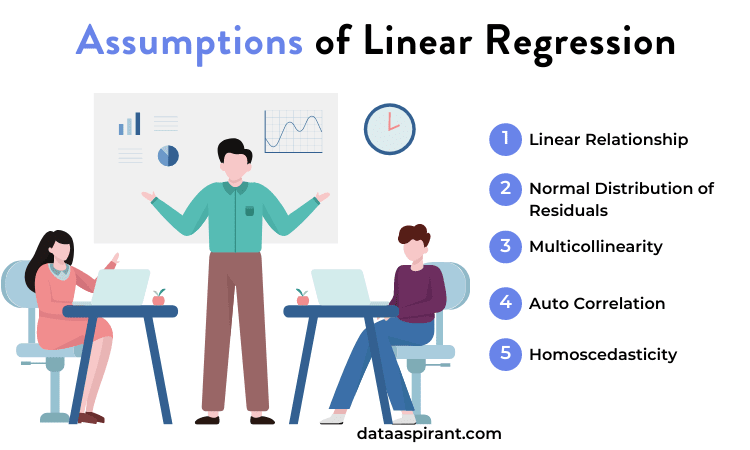

### Linearity Assumption

**The Assumption:** The relationship between the independent variables (X) and the dependent variable (y) is assumed to be linear.

**Why It Matters:** If the true relationship is non-linear, a linear model will systematically underfit the data, leading to poor predictions and misleading coefficient interpretations.

**How to Check:**
- Scatter plots of y vs. each X (for simple relationships)
- Residual plots: Plot residuals (y - ŷ) vs. predicted values (ŷ)
- Residuals should be randomly scattered around zero with no distinct pattern

**Violation Example:** A curved pattern in residual plots suggests a non-linear relationship.

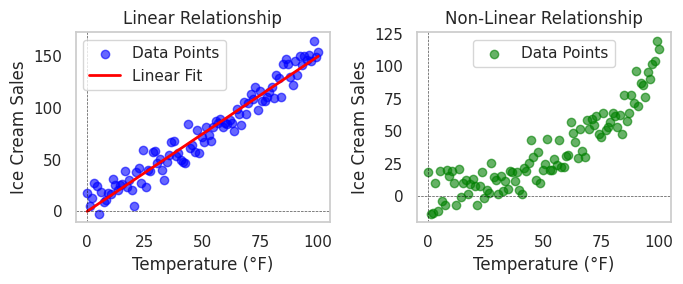

**Addressing Violations:**
- Transform variables (e.g., log, square root, polynomial)
- Use non-linear models (polynomial regression, splines)
- Feature engineering to capture non-linear relationships

### Independence Assumption

**The Assumption:** The observations (and their errors/residuals) are assumed to be independent of each other.

**Why It Matters:** Dependence between observations can lead to underestimated standard errors and overly confident inference.

**How to Check:**
- Especially important for time-series data and spatial data
- Durbin-Watson test (checks for autocorrelation)
- Plot residuals vs. observation order
- ACF (Autocorrelation Function) plots for time series

**Violation Example:** In time series data, observations close in time often have similar errors (positive autocorrelation).

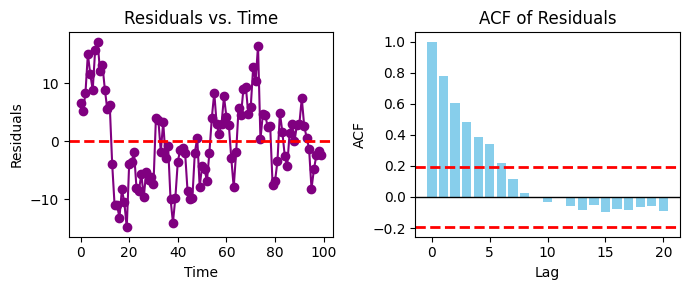

**Addressing Violations:**
- Use time series models (ARIMA, etc.)
- Include lagged variables as features
- Use mixed-effects models for clustered data
- Use robust standard errors

### Normality of Errors Assumption

**The Assumption:** The errors (residuals, $y - \hat{y}$) are assumed to be normally distributed around zero.

**Why It Matters:** Required for valid hypothesis tests on coefficients and prediction intervals. Less important for point predictions.

**How to Check:**
- Histogram of residuals (should be approximately bell-shaped)
- Q-Q plot (points should follow a straight line)
- Statistical tests (e.g., Shapiro-Wilk test)

**Violation Example:** A skewed histogram of residuals or Q-Q plot points deviating significantly from a straight line.

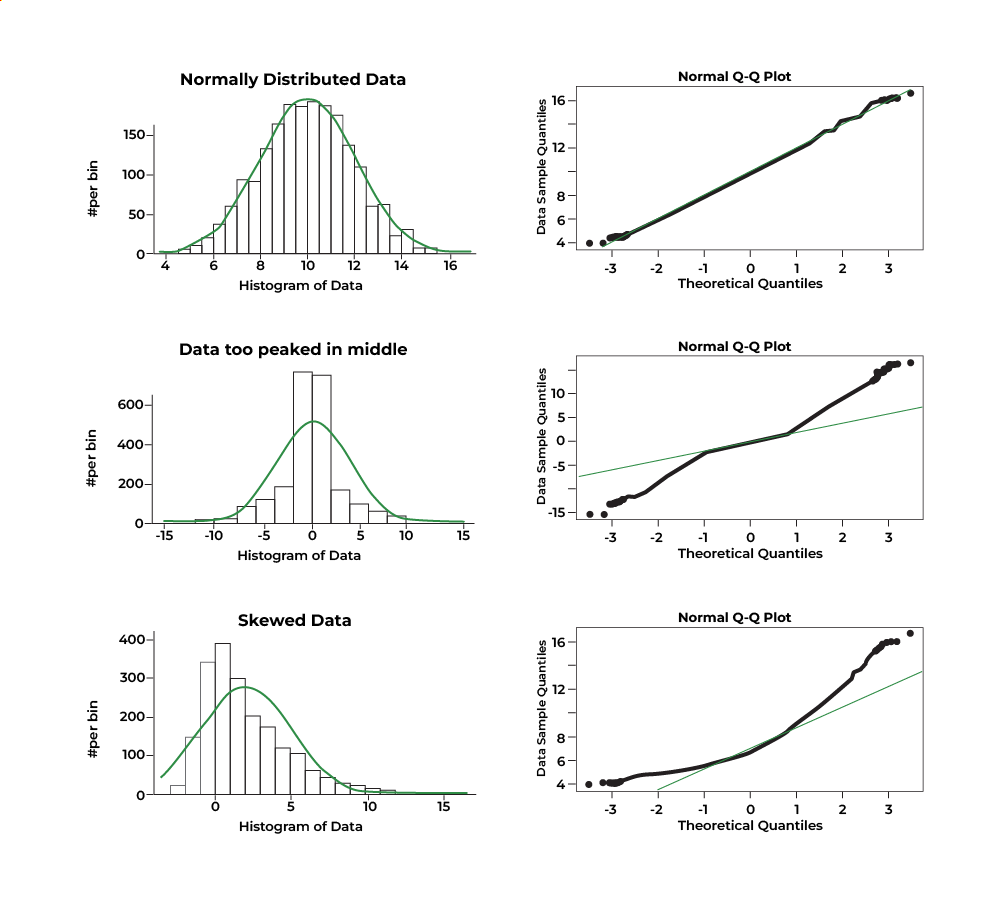

**Addressing Violations:**
- With large samples, the Central Limit Theorem makes this less concerning
- Transform the target variable (e.g., log transform for right-skewed data)
- Use robust regression methods
- Bootstrap for inference

### Equal Variance (Homoscedasticity) Assumption

**The Assumption:** The errors (residuals) are assumed to have constant variance across all levels of the independent variables.

**Why It Matters:** Heteroscedasticity (non-constant variance) can lead to inefficient coefficient estimates and invalid standard errors.

**How to Check:**
- Residual plot: Plot residuals vs. predicted values
- Should show random scatter around zero with constant spread
- Look for patterns like funnels or fans

**Violation Example:** A funnel shape in residual plots indicates heteroscedasticity (variance increases with the predicted value).

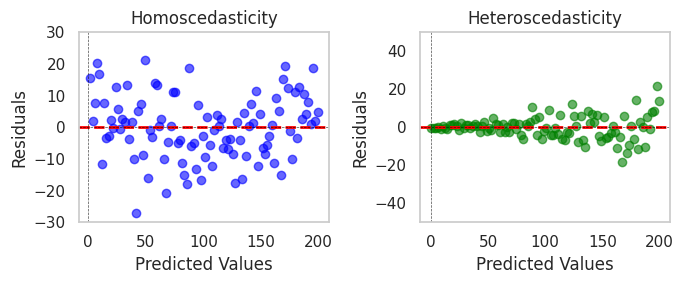

**Addressing Violations:**
- Transform the target variable (e.g., log transform)
- Use weighted least squares regression
- Use robust standard errors
- Consider specialized models for heteroscedastic data

### Multicollinearity Issue

**The Issue:** In Multiple Linear Regression, independent variables should not be highly correlated with *each other*.

**Why It Matters:** High multicollinearity makes it difficult to estimate individual coefficient effects reliably. Coefficients become unstable and may have counterintuitive signs.

**How to Check:**
- Correlation matrix between features (high correlations suggest multicollinearity)
- Variance Inflation Factor (VIF) > 10 suggests problematic multicollinearity
- Condition number of X'X matrix

**Examples of Multicollinearity:**
- Including both square footage and number of rooms in a housing price model
- Including both age and years of experience in a salary prediction model
- Including multiple financial ratios derived from the same underlying data

**Addressing Multicollinearity:**
- Drop redundant features
- Use domain knowledge to select uncorrelated features
- Create composite features
- Use regularization techniques (Ridge, Lasso)
- Use dimension reduction techniques (PCA)

### Practical Example: Checking Assumptions in Code

Here's how you might check these assumptions in Python:

In [ ]:
# Assuming you've fitted a model and have predictions
# residuals = y_true - y_pred

# 1. Linearity & Homoscedasticity Check
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 2. Normality Check
plt.figure(figsize=(12, 5))
# Histogram
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Q-Q Plot
plt.subplot(1, 2, 2)
import scipy.stats as stats
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot')
plt.tight_layout()
plt.show()

# 3. Independence Check (for time series)
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.title('Residuals vs. Order')
plt.show()

# 4. Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for calculating VIF
X_with_constant = sm.add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X_with_constant.columns
vif["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]
print(vif)

### Addressing Assumption Violations

If linear regression assumptions are violated, you have several options:

1. **Data Transformation:**
   - Log transformation for skewed data or to address heteroscedasticity
   - Power transformations (e.g., Box-Cox)
   - Feature transformations to capture non-linearity

2. **Alternative Models:**
   - Generalized Linear Models for non-normal errors
   - Robust regression methods for outliers
   - Time series models for autocorrelated data
   - Non-linear models for non-linear relationships

3. **Regularization:**
   - Ridge regression for multicollinearity
   - Lasso regression for feature selection

4. **Advanced Techniques:**
   - Use weighted least squares for heteroscedasticity
   - Use robust standard errors for inference
   - Consider bootstrapping for inference with violations

The right approach depends on both statistical considerations and the practical context of your problem.

<a id="interactive-exercises"></a>

## Interactive Exercises

### Exercise 1: Interpreting Coefficients
Let's imagine we built a linear regression model to predict house prices based on the following features:

In [2]:
Price = 50,000 + 120 × SquareFeet - 5,000 × Age + 15,000 × NumBedrooms

SyntaxError: invalid character '×' (U+00D7) (3431704174.py, line 1)

1. What is the predicted price of a new house (Age = 0) with 2,000 square feet and 3 bedrooms?
2. What is the expected difference in price between two houses that are identical except one is 5 years older?
3. If a homeowner adds a bedroom without changing the square footage, how much value would we expect to be added?
4. Interpret the meaning of the intercept in this context. Is it meaningful?

### Exercise 2: Identifying Assumption Violations
For each of the following residual plots, identify which assumption is likely being violated and suggest a possible remedy:

1. ![Residual Plot 1](https://i.imgur.com/UbYKq5a.png)
2. ![Residual Plot 2](https://i.imgur.com/9VlAKMw.png)
3. ![Residual Plot 3](https://i.imgur.com/cG16rXp.png)
4. ![Histogram of Residuals](https://i.imgur.com/Gv5Fqh3.png)

### Exercise 3: Working with Multicollinearity
Imagine you're building a model to predict a person's income based on the following features:
- Age (in years)
- Education (in years)
- Experience (in years)
- Tenure at current job (in years)

1. Which pairs of features might be highly correlated?
2. How would you detect multicollinearity in this dataset?
3. What strategies could you use to address potential multicollinearity?
4. If you calculated VIF values and found Age had a VIF of 12, what would this indicate and what would you do?

<a id="practice-questions"></a>

## Practice Questions

1. What is the key difference between Simple Linear Regression and Multiple Linear Regression in terms of model representation and geometric interpretation?

2. If you fit a linear regression model and find that a feature has a negative coefficient, what does this mean about the relationship between that feature and the target variable? Give a real-world example.

3. In multiple linear regression, what is the interpretation of a coefficient for one feature "holding all other features constant"? Why is this qualification important?

4. Explain each assumption in the L.I.N.E. framework for linear regression. For each assumption, describe:
   - What the assumption means in simple terms
   - How you would check if the assumption is met
   - What problems might arise if the assumption is violated

5. How does multicollinearity affect the coefficient estimates in a linear regression model? Why is this problematic for interpretation?

6. When examining a scatter plot of residuals versus predicted values, what specific patterns would indicate:
   - Non-linearity
   - Heteroscedasticity
   - A well-fitting model

7. If you observe that your residuals are not normally distributed, but you have a large sample size (n > 1000), should you be concerned? Explain why or why not.

8. You've built a linear regression model to predict employee salaries based on years of experience, education level, and job role. The model has an R² of 0.65. Your colleague suggests adding the employee's age to improve the model, but you're concerned about multicollinearity with years of experience. How would you investigate this concern, and what options would you have if multicollinearity is present?

9. Explain the matrix representation of multiple linear regression. What are the advantages of using this representation in computational implementations?

10. When would transforming variables (like using log transformations) be appropriate in linear regression? Give examples of scenarios where you might consider transformations.